## Gaussian mixture models
##### Jessica Morrise

In [3]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

The variable $k$ represents the number of Gaussians we will draw our data from. For this example, we will use only one-dimension Gaussians. We then choose the weights or mixing coefficients $L$, the means $\mu$, and the variances $\sigma^2$.

In [84]:
k = 3
L_actual = [0.4,0.4,0.2]
mu_actual = [-1.0, 6.0, 2.0]
sig_actual = [1.0, 1.0, 1.0]

Here we generate data points and plot the data as a histogram.

In [85]:
def generate_data(n):
    data = np.empty((n,1))
    for i in xrange(n):
        j = 0
        rand = np.random.rand()
        l = L_actual[j]
        while l < rand:
            j += 1
            l += L_actual[j]
        datum = np.random.normal(loc=mu_actual[j],scale=sig_actual[j])
        data[i] = datum
    return data

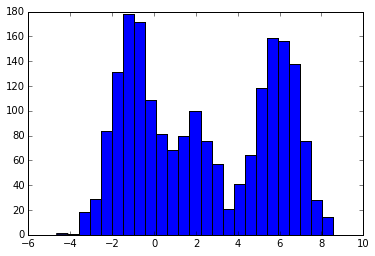

In [86]:
data = generate_data(2000)
plt.hist(data, bins=25)
plt.show()

To run the GMM algorithm, we choose initial guesses for the mixing coefficients, means, and variances below. The next cell runs the algorithm for $n_{iters}$ iterations and estimates the correct values for $L$, $\mu$, and $\sigma^2$ for each Gaussian.

In [111]:
L = [0.4,0.4,0.2]
mu = [0.0,7.0,2.0]
sig = [0.9, 0.9,0.9]

In [112]:
n_iters = 8
for t in xrange(n_iters):
    normals = []
    for j in xrange(k):
        normals.append(stats.norm(loc=mu[j], scale=sig[j]))
    p_data = sum([L[j]*normals[j].pdf(data) for j in xrange(k)])
   
    weights = []
    for j in xrange(k):
        weights.append(L[j]*normals[j].pdf(data)/p_data)
    L = [w.mean() for w in weights]
    mu = [np.sum(w*data)/w.sum() for w in weights]
    sig = [np.sum(w*(data-c)**2)/w.sum() for w,c in zip(weights,mu)]
    if t%2==0:
        print "\rL = {}\nmu = {}\nsig = {}\n".format(L,mu,sig)
        
print "Final:"
print"\rL = {}\nmu = {}\nsig = {}\n".format(L,mu,sig)

L = [0.44656436760749263, 0.37135596192631093, 0.18207967046619636]
mu = [-0.84091630069957801, 6.0840179692563812, 2.4412716708018123]
sig = [1.3335736241025371, 0.78252817577438272, 1.0943245185659913]

L = [0.45416617121070862, 0.3694375374764105, 0.17639629131288093]
mu = [-0.7699759112079394, 6.0798796466721132, 2.4483523669311675]
sig = [1.5437974671679318, 0.80660520798371815, 1.4180808643544169]

L = [0.47020828199861359, 0.34806494637855528, 0.18172677162283105]
mu = [-0.51851526811803705, 6.1090897532581971, 2.4529638792180699]
sig = [2.2243929393289439, 0.77438777530923841, 3.8888005679985875]

L = [0.58368327867906555, 0.30002510319115649, 0.11629161812977792]
mu = [0.42471569708670215, 6.0676827386194727, 2.2354357473797615]
sig = [5.1347960514649591, 0.57987181595040582, 11.425761961325282]

Final:
L = [0.67385154529108993, 0.25641008901900875, 0.069738365689901383]
mu = [0.98322693276824769, 6.0571348617036085, 1.615460190867761]
sig = [7.6708123170065132, 0.446852350188

Below is a visualization of our data vs. our estimations. The Gaussians we estimated are drawn in red. You can see that the algorithm is pretty finicky and is very sensitive to the inital guess.

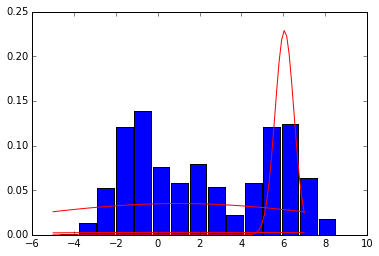

In [104]:
data_counts, data_x = np.histogram(data,bins=15)
plt.bar(data_x[:-1], data_counts/float(data.shape[0]))

domain = np.linspace(-5,7,101)
for j in xrange(k):
    plt.plot(domain, stats.norm(loc=mu[j],scale=sig[j]).pdf(domain)*L[j],color='r')
plt.show()